Optimizer
Overfitting
Regularization


### Optimizer
- 무엇을 선택하느냐에 따라 딥러닝의 속도가 달라짐.

- Gradient Decent: 모든 데이터에 대하여 그라디언트를 계산, 연산량 과다.
  - 방법: SGD, Adam

- Stochastic Gradient Decent: 확률적으로 "랜덤"하게 데이터를 뽑아 가중치를 업데이트
    - Global minimum을 찾아가는데 보다 효율적으로 접근.
- Mini-batch Stochastic Gradient Decent: 
    - 미니배치 당 한 번씩 그라디언트를 업데이트, 
      - 1epoch마다 하는게 아님.
        - 이미지 데이터 하나에 5mega, 100만장 -> 500만mega.
        - 데이터를 쪼개서 단위를 만든게 미니배치.
    - 일반적으로 SGD는 Mini-batch Stochastic Gradient Decent임.
  - Ada-Grad (Adaptive Gradient)
    - 파라미터마다 학습률을  Adaptive하게 다르게 조정
    - 학습에 따른 누적 크기가 커질수록 학습률 하락
      - global minimum에 가까울수록 조금 더 세밀하게 학습하는게 효율적.
      - $g_t$(gradient decent) = $g_{t-1}$ + (
        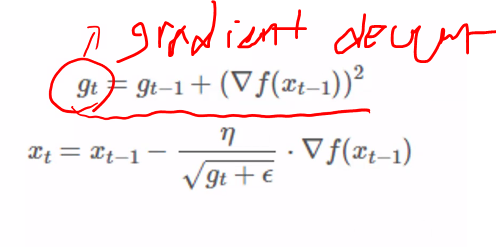
  - RMSProp
    - Ada-Grad는 학습률이 꾸준히 감소하다가 0으로 수렴(업데이트가 안됨)
    - 파라미터별 학습률 조절하되, 기울기 업데이트시 지수이동평균을 활용
    - 최근의 기울기 많이 반영, 과거 기울기는 조금 반영.
      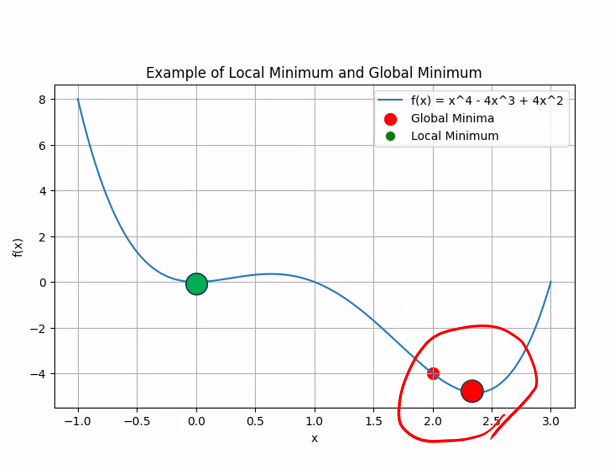
      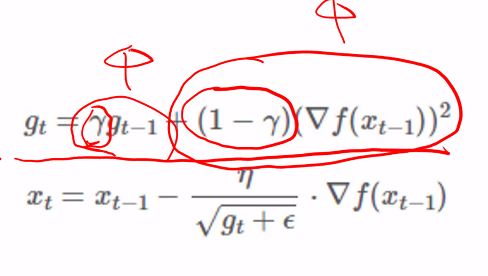

  - Momentum
    - 이동했던 ``방향``을 기억
    - 이전 기울기를 고려하여 추가이동 (local minima에서 걸리지 않고 global을 찾아가도록.)
      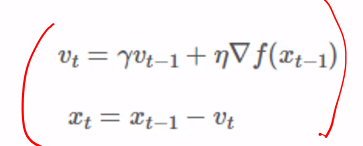
  
  - Adam
    - RMSProp + Momentum
      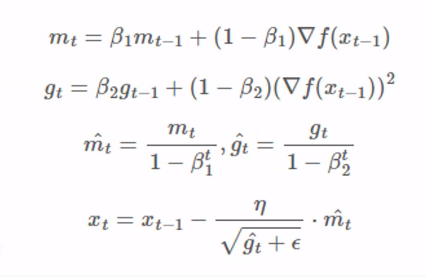



### Over Fitting

- 데이터양 및 다양성 부족 
- 너무 많은 파라미터와 깊은 층을 가진 경우
  - 데이터의 양이나 성격에 따라 크기를 달리해야 유리
- 학습과정에서 local minima에 갇히는 경우
  - 일정 구간에서 Loss가 줄어들지 않는 경우
  -  (optimizer, lr에 따라 달라짐)
- 과도한 학습 (epoch)

```서울을 학습하면, 경기도도 대충은 예측 가능할텐데, 너무 서울에만 빠지면..```
  
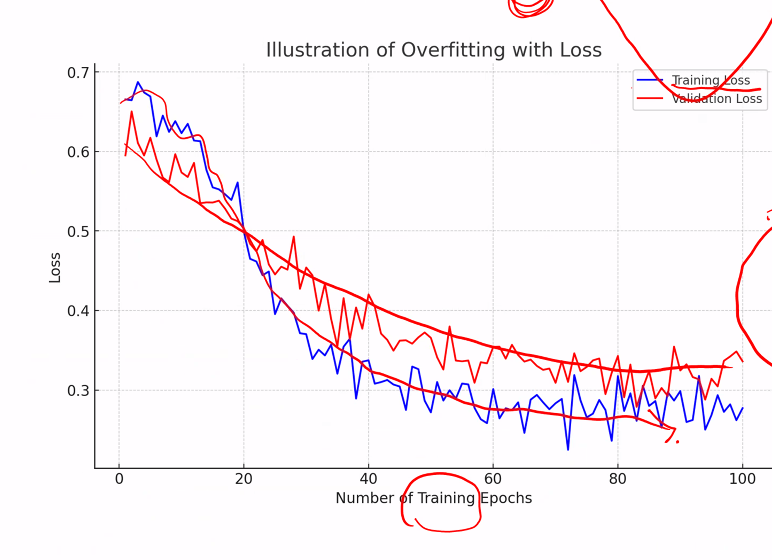



### Regularization (규제)

- $L_0$은 원래는 손실함수 (예: MSE,  크로스 엔트로피),
- $w_i$는 모델 파라미터
- $\lambda$는 규제의 강도를 조절하는 하이퍼파라미터
- $n$은 가중치의 수
  
  일반화할 수 있도록 모델에 규제를 가한다.
  - L1규제 (Lasso)
  - L2 규제(Ridge)
    - 가중치의 제곱합 만큼.
    - 파이토치는 L2를 쓰도록 되어있다.
  
      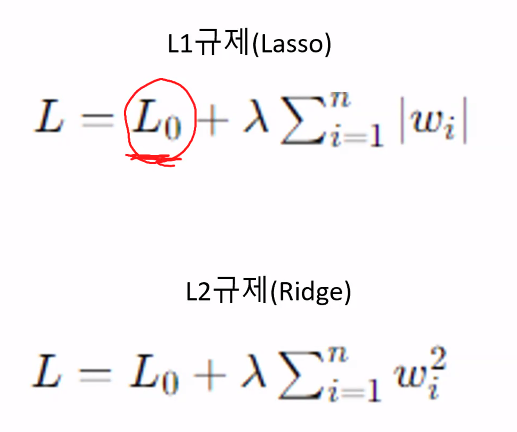



### Drop-out

- 너무 학습이 잘 되어 over fitting된 모델의 경우, ```몇 개 노드를 빼고``` 학습시키기도.
- Drop-out되는 노드는 랜덤으로 변경
- 앙상블 효과
  - 마치 여러 모형을 학습 시킨 것 같은 효과가 날 수 있다.
- Inference(예측, 추론) 시에는 모든 노드를 사용함

## 지난주 과제

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader, TensorDataset # Dataset은 customizing 하는 set, 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [2]:


# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 데이터 프레임으로 변환
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# 텐서로 변환
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)

In [9]:
# 데이터 로더 생성
train_dataset  = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True) #미니배치에는 16개 데이터 들어있음, shuffle: 한번의 epoch 돈 후, 새로운 batch만들어줌.(cross validation과 비슷. 여러 데이터의 분포 학습시킴)



In [11]:
model =nn.Sequential(
        nn.Linear(4, 50),
        nn.ReLU(),
        nn.Linear(50,3)
                      ).to(device)

In [7]:
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 50) #fc layer : 모든 노드가 모든 다음 노드에 연결.
        self.fc2 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = IrisNet()

In [12]:
criterion =nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 학습 과정
epochs = 10000
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        inputs = inputs.to(device)  
        labels = labels.to(device) 
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 1000 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item(): .4f}')

Epoch 1000/10000, Loss:  0.0010
Epoch 2000/10000, Loss:  0.0000
Epoch 3000/10000, Loss:  0.0000
Epoch 4000/10000, Loss:  0.0000
Epoch 5000/10000, Loss:  0.0000
Epoch 6000/10000, Loss:  0.0000
Epoch 7000/10000, Loss:  0.0000
Epoch 8000/10000, Loss:  0.0000
Epoch 9000/10000, Loss:  0.0000
Epoch 10000/10000, Loss:  0.0000


In [17]:
outputs

tensor([[-513.0806, -466.6750, -499.5118],
        [-745.5898, -710.7422, -629.5015],
        [-423.9999, -371.1286, -431.1673],
        [-780.1041, -725.3489, -701.5963],
        [-667.6749, -621.8034, -589.0311],
        [-872.4235, -817.3705, -754.1632],
        [-370.2928, -309.6500, -388.4744],
        [-521.5182, -435.4769, -554.1309]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [23]:
model.eval()  # 평가 모드로 전환
with torch.no_grad():
    # 모델의 모든 가중치를 지정된 장치로 이동
    model.to(device)
    # X_test_tensor를 지정된 장치로 이동
    X_test_tensor = X_test_tensor.to(device)
    # y_test_tensor를 지정된 장치로 이동
    y_test_tensor = y_test_tensor.to(device)
    outputs = model(X_test_tensor)
    predicted = torch.argmax(outputs, 1)
    accuracy = (predicted == y_test_tensor).float().mean()

In [24]:
outputs

tensor([[ -451.7798,  -395.6398,  -455.1757],
        [  109.2312,   -83.0345,  -269.2991],
        [-1305.0961, -1257.8435, -1060.9437],
        [ -451.6694,  -398.8061,  -448.8314],
        [ -622.5135,  -545.5723,  -612.8786],
        [   67.9408,   -80.5890,  -256.6589],
        [ -247.6337,  -195.4094,  -326.4003],
        [ -799.5044,  -729.7115,  -718.8154],
        [ -723.3919,  -660.1268,  -675.5958],
        [ -355.8446,  -285.1963,  -416.2570],
        [ -632.9150,  -578.0080,  -574.5219],
        [  -10.3701,  -245.1320,  -185.6931],
        [   97.1564,   -77.0348,  -277.1672],
        [   12.0917,  -216.6763,  -189.6808],
        [  108.3841,  -106.3938,  -285.5607],
        [ -426.4551,  -360.5645,  -444.6821],
        [ -826.9935,  -801.4236,  -672.0079],
        [ -387.3371,  -326.9640,  -429.9609],
        [ -404.4657,  -344.1086,  -420.2662],
        [ -845.4473,  -826.4665,  -686.4753],
        [   10.3546,  -233.7272,  -173.5358],
        [ -554.8970,  -520.4932,  

### Dataset, DataLoader

In [25]:
X_train_tensor.shape

torch.Size([120, 4])

In [26]:
y_train_tensor

tensor([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0,
        2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1,
        0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0,
        0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
        2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [27]:
data = [X_train_tensor, y_train_tensor]

In [28]:
class Iris_Dataset(Dataset):
  def __init__(self, data):
    super().__init__()
    self.X = data[0]
    self.y = data[1]

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [31]:
train_dataset = Iris_Dataset(data) # .데이터셋 만들었다.

In [30]:
train_dataset.__len__()

120

In [33]:
train_dataset.__getitem__(1)

(tensor([-0.1331,  2.9924, -1.2760, -1.0456]), tensor(0))

#### Data Loader만들자

In [34]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True) 
# 120 개 중 16개 미니배치. -> 108개 중 16개 미니배치... -> 마지막은 8개 중에서  계속 돌게 됨.  이 때, drop_last 하면 마지막은 제외. 
# 이 상황에서 shuffle을 같이 쓰면, 마지막의 데이터가 제외되는 경우가 없어질 수 있음.